
# Classify images using CNNs
###### Based on Jupyter Notebook provided by Dr. Ryan Ahmed @STEMplicity, as part of the Udemy course "Build 8 Practical Projects and Go from Zero to Hero in Deep/Machine Learning, Artificial Neural Networks".

### 0. Problem Statement

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


### 1. Import libraries/Datasets

#### 1.1. Get the main libraries needed

In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn # type: ignore

#### 1.2 Get the CIFA10 dataset

In [2]:
import tensorflow # type: ignore
from keras.datasets import cifar10 # type: ignore
(X_train,y_train), (X_test, y_test) = cifar10.load_data()

#### 1.3 Getting training and test data shapes

In [3]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


### 2. Visualize Data

[8]


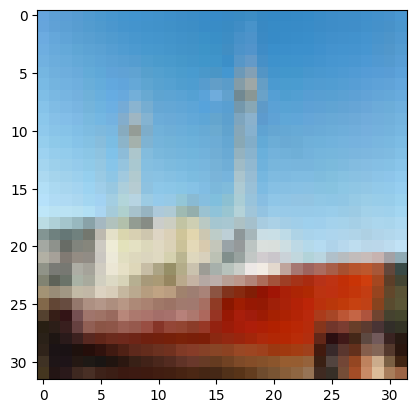

In [4]:
i = 1032
plt.imshow(X_train[i])
print(y_train[i])

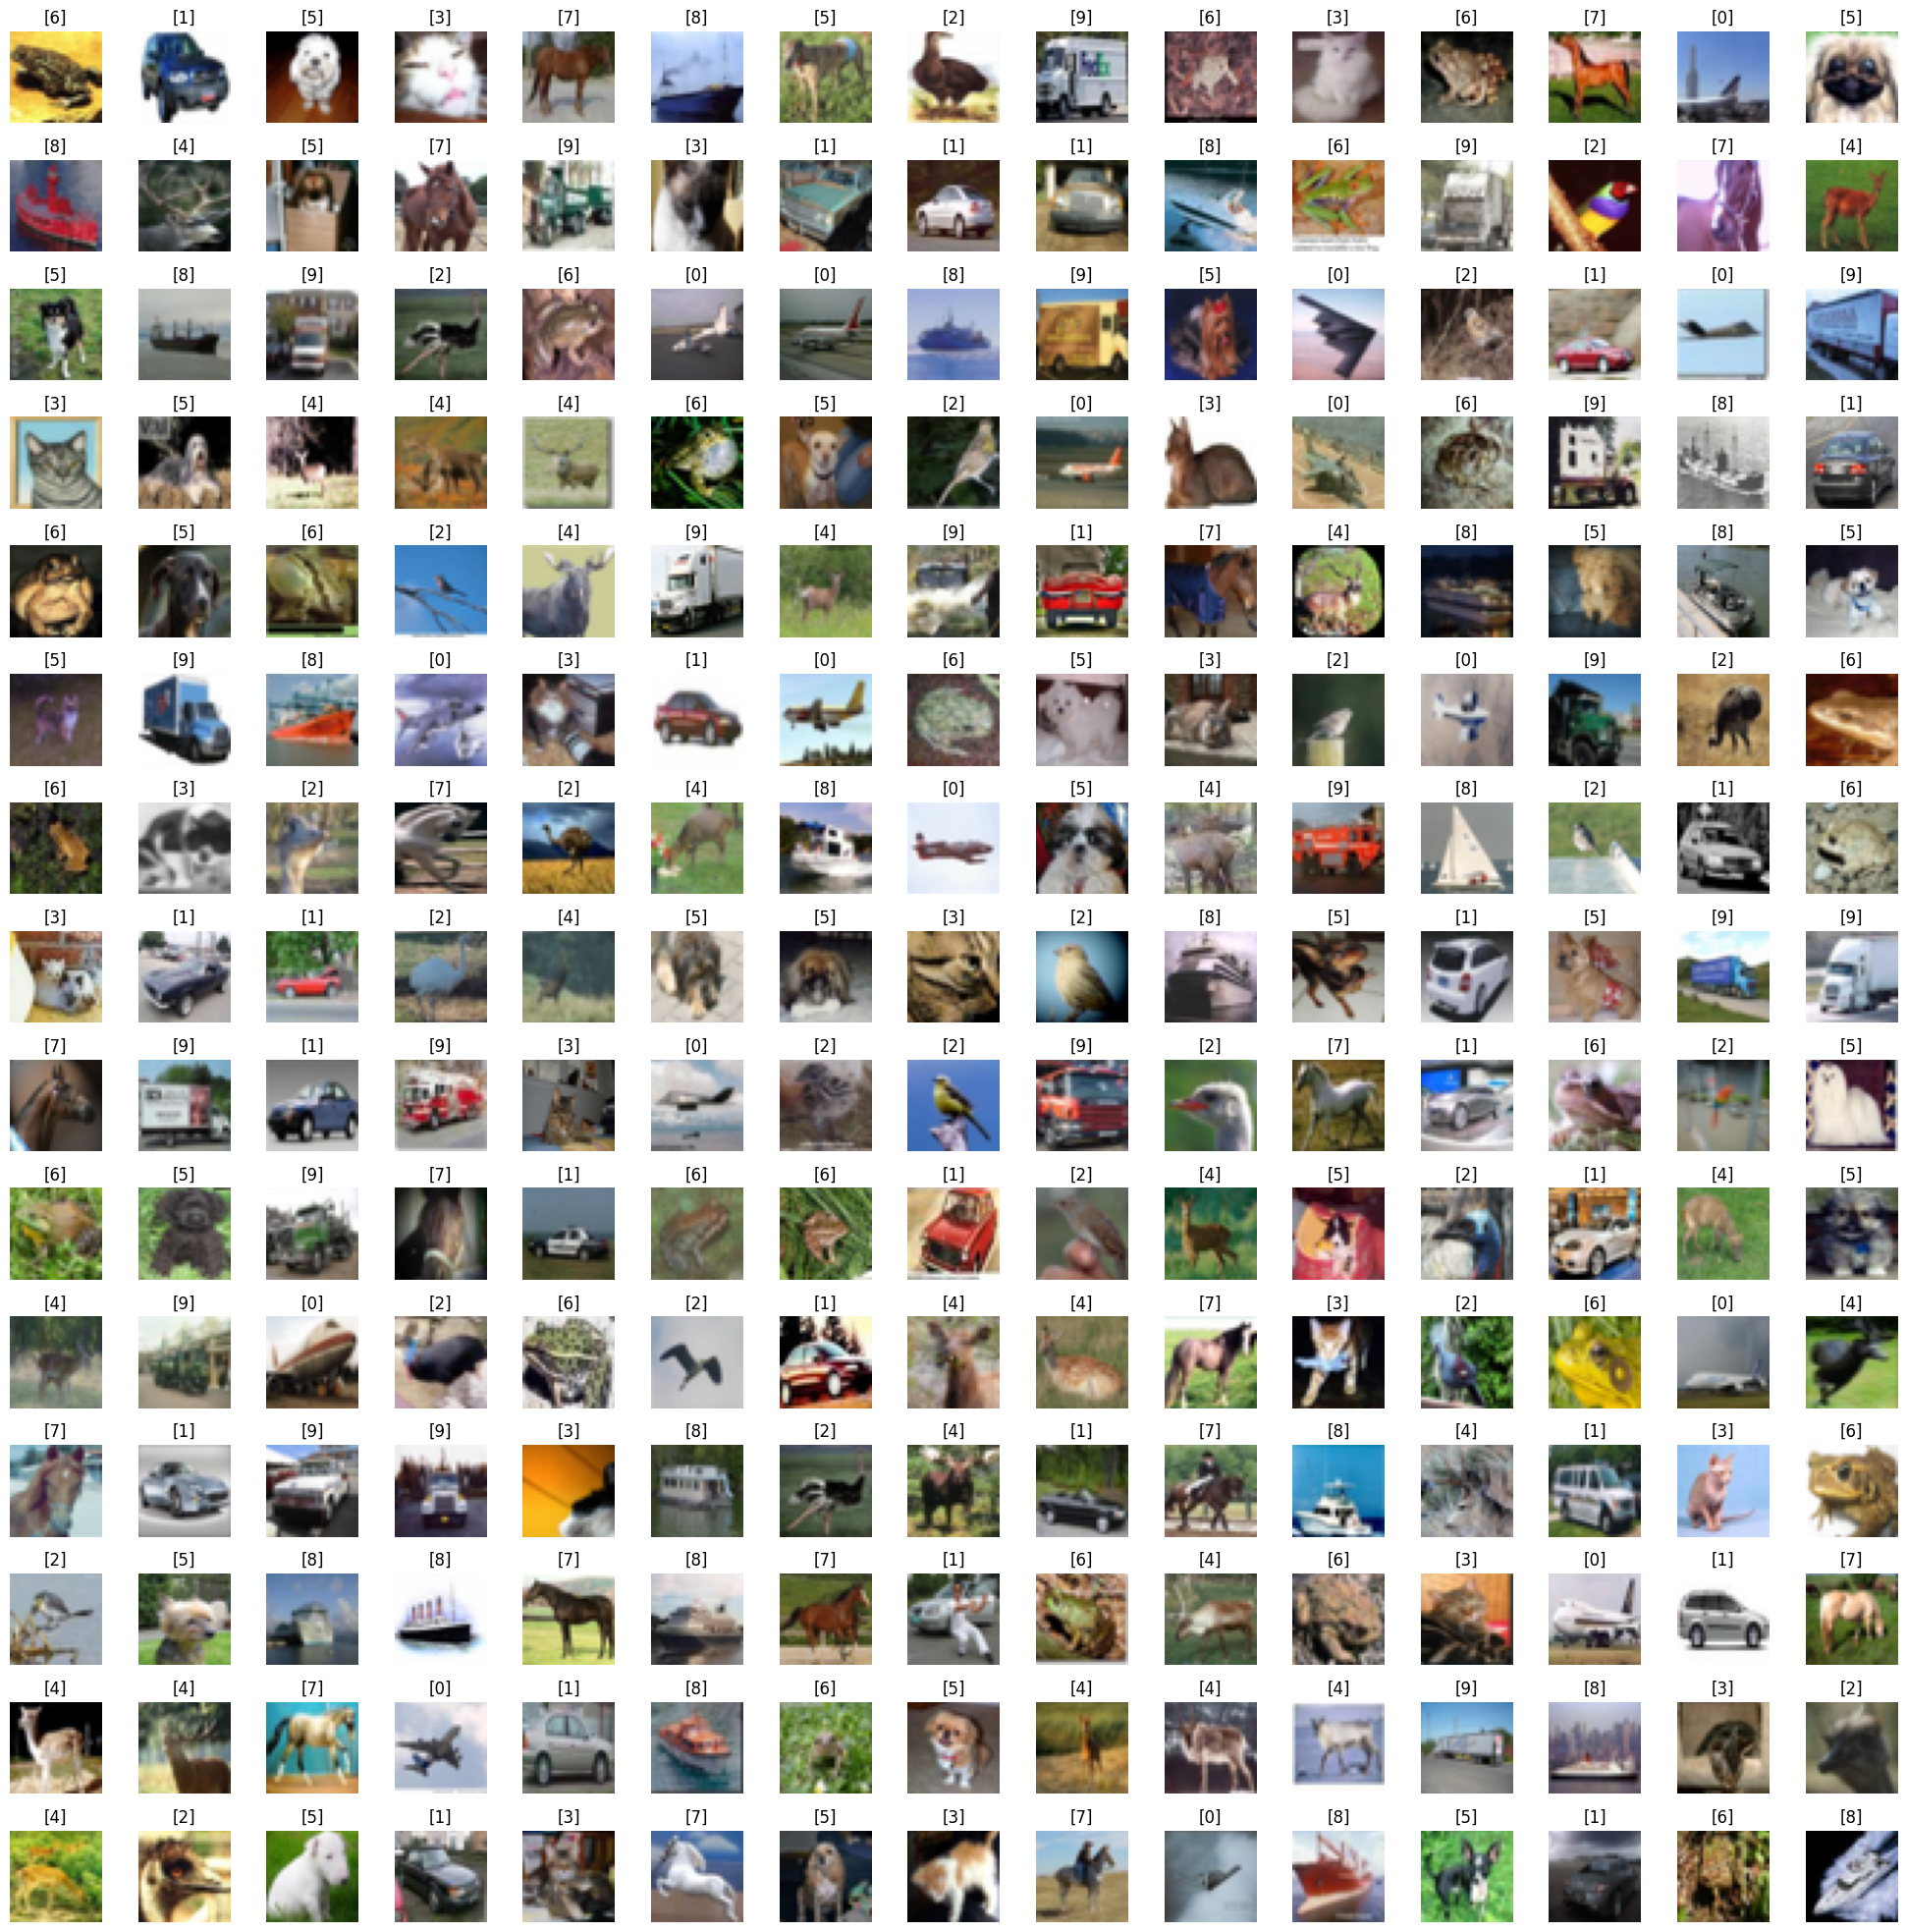

In [5]:
L_grid = 15
W_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].axis('off')
    axes[i].set_title(y_train[index])

plt.subplots_adjust(hspace=0.4)

### 3. Data Preparation

#### 3.1 Convert X_train and X_test to float type

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#### 3.2 Convert y_train and y_test to categorical

In [7]:
number_cat = 10

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
import keras

y_train = keras.utils.to_categorical(y_train, number_cat)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [11]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [12]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

#### 3.3 Data normalization

In [13]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [15]:
input_shape = X_train.shape[1:]
print(input_shape)

(32, 32, 3)


### 4. Model Training

#### 4.1 Set up neural network

In [16]:
from keras.models import Sequential #type: ignore
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout, Input #type: ignore
from keras.optimizers import Adam #type: ignore
from keras.callbacks import TensorBoard #type: ignore

In [17]:
cnn_model = Sequential()
cnn_model.add(Input(shape=(input_shape)))
cnn_model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
cnn_model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=512, activation='relu'))
cnn_model.add(Dense(units=512, activation='relu'))
cnn_model.add(Dense(units=number_cat, activation='softmax'))

#### 4.2 Fit data to model

In [18]:
cnn_model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'] )

In [19]:
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=5, shuffle=True)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.3246 - loss: 1.8376
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5678 - loss: 1.2163
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6525 - loss: 0.9959
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6948 - loss: 0.8854
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7153 - loss: 0.8360


First Run Parameters <br>
Filters: 32, 32, 64, 64 <br>
Dropout: 0.3, 0.2 <br>
Dense units: 512, 512 <br>
Epochs: 2 <br><br>
Training History: <br><br>
Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.3241 - loss: 1.8263

Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - **accuracy: 0.5827** - loss: 1.1741
_____________________________________________________________________________________________________________________________
Second Run Parameters <br>
Filters: 64, 64, 128, 128 <br>
Dropout: 0.5, 0.4 <br>
Dense units: 1024, 1024 <br>
Epochs: 2 <br><br>
Training History: <br><br>
Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 67ms/step - accuracy: 0.2909 - loss: 1.9047

Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - **accuracy: 0.5639** - loss: 1.2379
_____________________________________________________________________________________________________________________________
Third Run Parameters <br>
Filters: 32, 32, 64, 64 <br>
Dropout: 0.3, 0.2 <br>
Dense units: 512, 512 <br>
Epochs: 5 <br><br>
Training History: <br><br>
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.3246 - loss: 1.8376

Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5678 - loss: 1.2163

Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6525 - loss: 0.9959

Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6948 - loss: 0.8854

Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - **accuracy: 0.7153** - loss: 0.8360


- After three runs of training with a different set of parameters, it is possible to see that changing the number of epochs has more relevance to the model's accuracy than tweaking with the number of filters, units, or dropout percentage.
- Another relevant topic is the training time required. It is possible to see that on the second run (where filters and units were doubled compared to the first run, number of epochs were keep constant and dropout increased), the training time was dramatically increased while performance in terms of accuracy worsened.
- Also important to mention, more than one parameters at a time was changed, so the comparison has limited significance in terms of conclusions. For the comparison to become more conclusive, it would be required to vary every parameters separately, and check their impact on accuracy. For the sake of keeping processing time low in this specific case study, only 3 runs were done.

### 5. Model Evaluation

### 6. Saving The Model

### 7. Improving The Model With Data Augmentation

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 
- Augmentations also include shifting and changing the brightness of the images.

#### 7.1. Data Augmentation for the CIFAR-10 dataset

#### 7.2. Model training using augmented dataset

#### 8. References

This tech report (Chapter 3) describes the dataset and the methodology followed when collecting it in much greater detail.

[Learning Multiple Layers of Features from Tiny Images](https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf), Alex Krizhevsky, 2009.